In [1]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)


In [2]:
# Reading the dataset
df = pd.read_csv('Marketing_cost_prediction.csv', encoding = 'latin')
# Printing the first 5 rows of the dataset
df.head()

,Region,Amount spent (INR),Results
0,Maharashtra,13166,122
1,Kerala,14725,235
2,Madhya Pradesh,48925,472
3,Haryana,2217,24
4,Rajasthan,7925,89


In [3]:
#creating a copy of dataset
df_copy = df.copy()

In [4]:
#lets check the shape of dataset
df_copy.shape

(12619, 3)

In [5]:
#checking the basic informations about the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12619 entries, 0 to 12618
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              12619 non-null  object
 1   Amount spent (INR)  12619 non-null  int64 
 2   Results             12619 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 295.9+ KB


In [6]:
#checking the descriptive statistics of the dataset
df_copy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Region,12619,31,Tamil Nadu,1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount spent (INR),12619.0,NaN,NaN,NaN,24052.790792,16113.486401,0.0,10067.5,23418.0,37458.0,86339.0
Results,12619.0,NaN,NaN,NaN,249.63864,143.981776,1.0,125.0,252.0,374.0,500.0


In [7]:
#DATA PREPARATION AND CLEANING
df_copy.isnull().sum()

Region                0
Amount spent (INR)    0
Results               0
dtype: int64

In [8]:
df_copy.dropna(inplace=True)

In [9]:
df_copy.isnull().sum()

Region                0
Amount spent (INR)    0
Results               0
dtype: int64

In [10]:
df_new = df_copy[df_copy["Amount spent (INR)"]!=0]
df_new = df_copy[df_copy["Results"]!=0]

In [11]:
df_new.shape

(12619, 3)

<AxesSubplot:xlabel='Amount spent (INR)', ylabel='Density'>

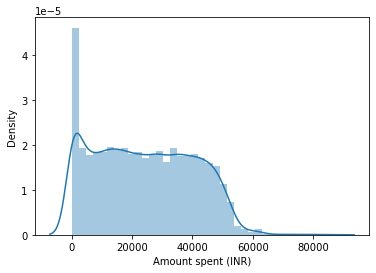

In [12]:
#Exploratory data analysis
#checking the distribution of dependent variable
sns.distplot(df_new["Amount spent (INR)"])

<AxesSubplot:xlabel='Amount spent (INR)'>

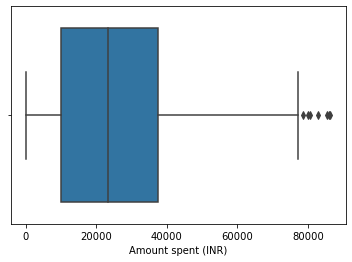

In [13]:
sns.boxplot(df_new["Amount spent (INR)"])

In [14]:
#Lets apply squareroot transformation to treat these outliers
sns.boxplot(x = np.sqrt(df_new["Amount spent (INR)"]

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_3684/1799956730.py, line 2)

In [ ]:
df_new["Amount spent (INR)"] = np.sqrt(df_new["Amount spent (INR)"])

<AxesSubplot:xlabel='Amount spent (INR)', ylabel='Density'>

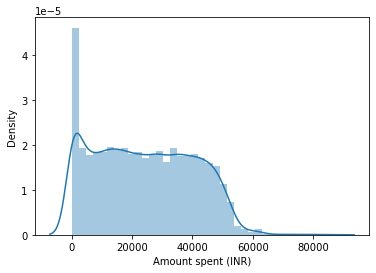

In [15]:
sns.distplot(df_new["Amount spent (INR)"])

In [16]:
categorical_feat = [feature for feature in df_new.columns if df_new[feature].dtypes == 'O']
print('The categorical features in the dataset are:',categorical_feat)

The categorical features in the dataset are: ['Region']


In [17]:
# Collecting numerical features present in the dataset
numerical_feat = [feature for feature in df_new.columns if df_new[feature].dtypes != 'O']
numerical_feat

['Amount spent (INR)', 'Results']

<AxesSubplot:>

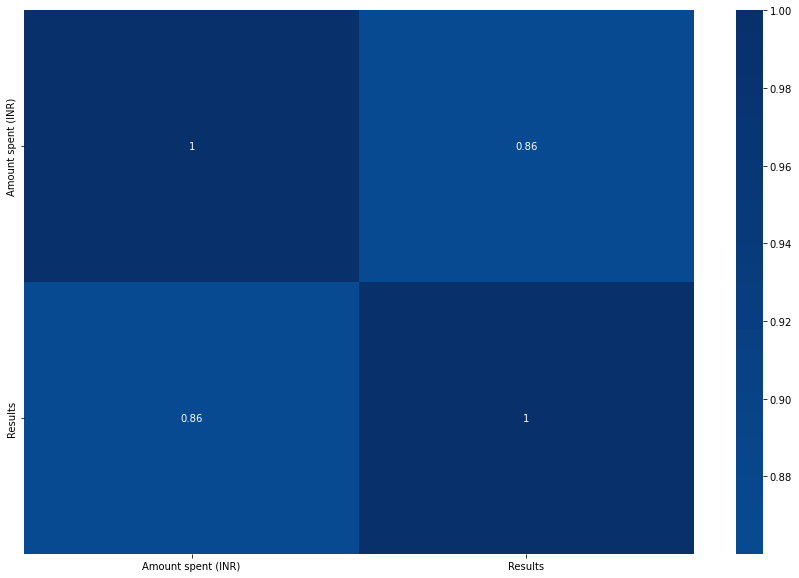

In [18]:
# Understanding correlation using heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df_new.corr(), annot = True, cmap = 'Blues', center = 0.3)

In [19]:
df_new

,Region,Amount spent (INR),Results
0,Maharashtra,13166,122
1,Kerala,14725,235
2,Madhya Pradesh,48925,472
3,Haryana,2217,24
4,Rajasthan,7925,89
...,...,...,...
12614,Delhi,16098,150
12615,Tamil Nadu,38134,395
12616,Maharashtra,39174,363
12617,Madhya Pradesh,44882,433


In [20]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_new['Region_label'] = labelencoder.fit_transform(df_new['Region'])


In [21]:
df_manual = df_new.loc[:, ['Region', 'Region_label']]

In [22]:
df_manual.head(30)

,Region,Region_label
0,Maharashtra,16
1,Kerala,14
2,Madhya Pradesh,15
3,Haryana,9
4,Rajasthan,23
5,Gujarat,8
6,Odisha,20
7,Bihar,2
8,Jharkhand,12
9,Chhattisgarh,4


In [23]:
df_manual.to_excel('region_label.xlsx', index=False)

In [24]:
df_new.head()

,Region,Amount spent (INR),Results,Region_label
0,Maharashtra,13166,122,16
1,Kerala,14725,235,14
2,Madhya Pradesh,48925,472,15
3,Haryana,2217,24,9
4,Rajasthan,7925,89,23


In [25]:
df_new.describe()

,Amount spent (INR),Results,Region_label
count,12619.000000,12619.000000,12619.000000
mean,24052.790792,249.638640,16.012521
std,16113.486401,143.981776,9.455463
min,0.000000,1.000000,0.000000
25%,10067.500000,125.000000,8.000000
50%,23418.000000,252.000000,16.000000
75%,37458.000000,374.000000,24.000000
max,86339.000000,500.000000,30.000000


In [26]:
df_new.drop("Region",axis = 1,inplace=True)

In [27]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [28]:
clean_dataset(df_new)

,Amount spent (INR),Results,Region_label
0,13166.0,122.0,16.0
1,14725.0,235.0,14.0
2,48925.0,472.0,15.0
3,2217.0,24.0,9.0
4,7925.0,89.0,23.0
...,...,...,...
12614,16098.0,150.0,6.0
12615,38134.0,395.0,24.0
12616,39174.0,363.0,16.0
12617,44882.0,433.0,15.0


In [29]:
#Linear Regression model
# Separating the dependent and independent features.
X = df_new.drop(columns= ['Amount spent (INR)'], axis =1)
y = df_new['Amount spent (INR)']

In [30]:
#Checking the variance inflation factor for features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Amount spent (INR)']]])

,variables,VIF
0,Results,2.233058
1,Region_label,2.233058


In [32]:
# Split the data for train and test
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)

(10095, 2)


In [33]:
# Fitting a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
# Checking the score
lr.score(X_train, y_train)

0.7505680343043414

In [35]:
# Checking the coefficient
lr.coef_

array([  96.06941383, -167.61568246])

In [36]:
# Predicting results on train and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [37]:
y_pred_train

array([14265.03419552, 16995.93140525, 40428.77571135, ...,
       31398.25081156, 26055.02578416, 38634.0494947 ])

In [38]:
y_pred_test

array([ -437.63245403, 45048.20024292, 37193.00828729, ...,
       38556.4337252 , 38807.73467804, 47063.63476634])

In [39]:
# evaluating the metrics on train set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_lr= mean_squared_error((y_train**2), (y_pred_train**2))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train**2, y_pred_train**2)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_train)**2, (y_pred_train)**2) #squaring the dependent variable y because dependent variable was transformed using square root
print("R2 :",r2_lr)
Adjusted_R2_lr = ((1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 1.8095203288954016e+17
RMSE : 425384570.5823616
MAE : 209817149.1762038
R2 : 0.7521622692503043
Adjusted R2 : 0.7519656506618475


In [40]:
# checking the metrics on test set
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test**2, y_pred_test**2)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test**2, y_pred_test**2)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test)**2, (y_pred_test)**2) #squaring the dependent variable y because dependent variable was transformed using square root
print("R2 :",r2_lr)
Adjusted_R2_lr = ((1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 1.7810684430830374e+17
RMSE : 422027065.8480375
MAE : 217743348.2220087
R2 : 0.7654354745866355
Adjusted R2 : 0.7652493861095127


In [41]:
#creating pickle file
import pickle
# Save the trained model as a pickle file
filename = 'linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lr, file)